# BUILD A CHILD GRID - NESTING NOTEBOOK VERSION

In [1]:
#Allows widget interactivity with user
%matplotlib widget  
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
os.environ['ETS_TOOLKIT'] = 'wx'
sys.path.append("./Modules/")
sys.path.append("./Readers/")
sys.path.append("./Modules/graphicUI_tools/")
import tools_grid_inputs
import tools_make_grid
#----------------------------------------------#
from tools_make_grid import inputs,inputs_smth,EasyGrid,GetMask,GetTopo
from croco_class import CROCO
#----------------------------------------------#
from scipy.spatial import distance
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact_manual
#----------------------------------------------#
from ipywidgets import FloatText, VBox
from IPython.display import display    

## ✏️🔧 User's changes

In [2]:
from tools_grid_inputs import setup_widgets

# Call the setup_widgets function to display the widgets and get the function to retrieve saved values
get_saved_config = setup_widgets(parent_grid= True)

In [69]:
# Use get_saved_config to access the saved values after clicking the save button
saved_config = get_saved_config()
config_chd_grid= {k: v for k, v in saved_config.items() if k != 'output_file'}

#create the grid
from tools_create_grids import create_child_grid_offline
chd_grid, inputs, prt= create_child_grid_offline(**config_chd_grid)

Reading topography file: ../../DATASETS_CROCOTOOLS/Topo/etopo2.nc
Single region dataset imin/imax= 5808 5891
Bounding indices of the relevant part to be extracted from the entire dataset:
 imin,imax = 5808 5891 out of 10800 jmin,jmax = 1710 1770 out of 5400
Interpolating topography to CROCO grid
Finished interpolating
ratio between prt and chld grid is approx: 2

 Geographical extents of the dataset:
Matching Parent and Child mask close to boundary
    Longitude min/max =   13.600000   16.366667
    Latitude  min/max =  -33.000000  -31.000000

 Geographical extents of requested ROMS grid:
    Longitude min/max =   13.636036   16.363964
    Latitude  min/max =  -32.956451  -31.037594

 Bounding indices for the portion of dataset covering the entire model grid:
 iwest,ieast =    2    83 out of    84 jsouth,jnorth =    2    59 out of    61

 Averaging window width = 2.00000 in grid spaces.

...

 Wall Clock time spent to compute hraw    0.00 sec running   1 threads.
 enter smooth_thread r

## 👁️🌐 Grid display

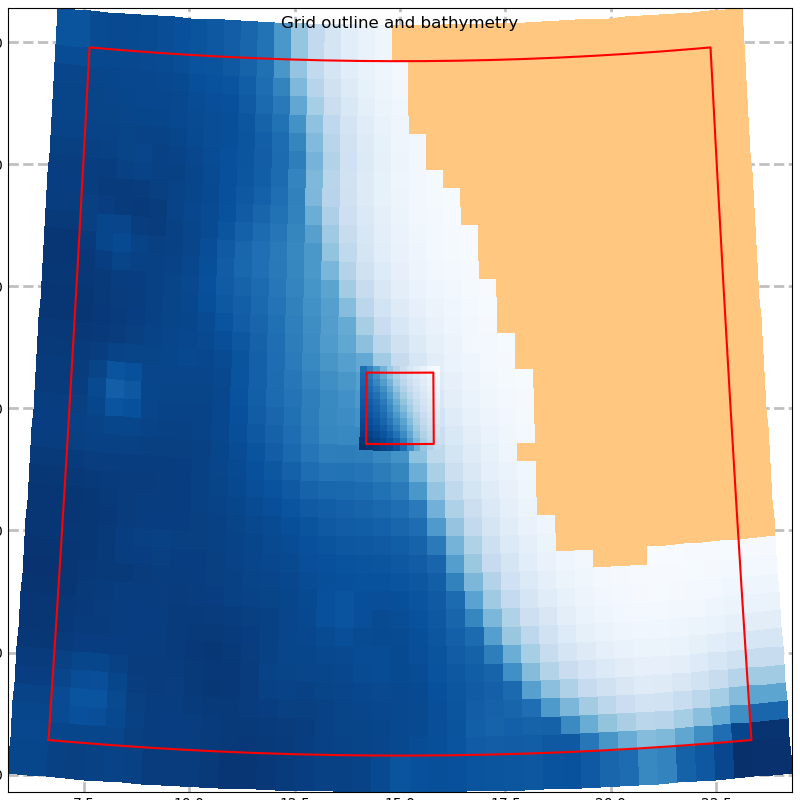

In [61]:
from tools_grid_edition import plot_outline_ax, plot_topo_bis
plt.style.use('_mpl-gallery')
figure2, ax2 = plt.subplots(figsize=(8, 8))
figure2.suptitle('Grid outline and bathymetry')
ax2 = plot_outline_ax(prt, ax2)
ax2, cb2 = plot_topo_bis(prt, figure2, ax2)
ax2 = plot_outline_ax(chd_grid, ax2)
ax2, cb2= plot_topo_bis(chd_grid, figure2, ax2)

### 💾 Save grid as necdf
This code creates a Netcdf file containing all grid data (geographic, topo-bathymetric, mask) in the format defined by the classes generated earlier in this notebook. Then it saves it in the ouput repertory.

In [71]:
CROCO.create_grid_nc(None,saved_config['output_file'],inputs,chd_grid)

PermissionError: [Errno 13] Permission denied: '../../CROCO_FILES/croco_chd_grd.nc'

In [68]:
vars(inputs)

mappingproxy({'__module__': 'tools_make_grid',
              '__doc__': '\n    Inputs to locate grid\n    ',
              '__init__': <function tools_make_grid.inputs.__init__(self, tra_lon, tra_lat, size_x, size_y, nx, ny, rot)>,
              '__dict__': <attribute '__dict__' of 'inputs' objects>,
              '__weakref__': <attribute '__weakref__' of 'inputs' objects>})